215759
50
    freq
0    0.0
1    0.2
2    0.4
3    0.6
4    0.8
5    1.0
6    1.2
7    1.4
8    1.6
9    1.8
10   2.0
11   2.2
12   2.4
13   2.6
14   2.8
15   3.0
16   3.2
17   3.4
18   3.6
19   3.8
20   4.0
21   4.2
22   4.4
23   4.6
24   4.8
25  -5.0
26  -4.8
27  -4.6
28  -4.4
29  -4.2
30  -4.0
31  -3.8
32  -3.6
33  -3.4
34  -3.2
35  -3.0
36  -2.8
37  -2.6
38  -2.4
39  -2.2
40  -2.0
41  -1.8
42  -1.6
43  -1.4
44  -1.2
45  -1.0
46  -0.8
47  -0.6
48  -0.4
49  -0.2
[0.109375, 0.09375, 0.109375, 0.15625, 0.125, 0.125, 0.15625, 0.125, 0.078125, 0.109375, 0.125, 0.109375, 0.078125, 0.140625, 0.078125, 0.125, 0.140625, 0.125, 0.09375, 0.125, 0.15625, 0.125, 0.125, 0.09375, 0.125, 0.125, 0.140625, 0.09375, 0.125, 0.140625, 0.15625, 0.09375, 0.09375, 0.125, 0.125, 0.125, 0.140625, 0.109375, 0.125, 0.15625, 0.125, 0.09375, 0.15625, 0.125, 0.140625, 0.125, 0.125, 0.140625, 0.15625, 0.09375]


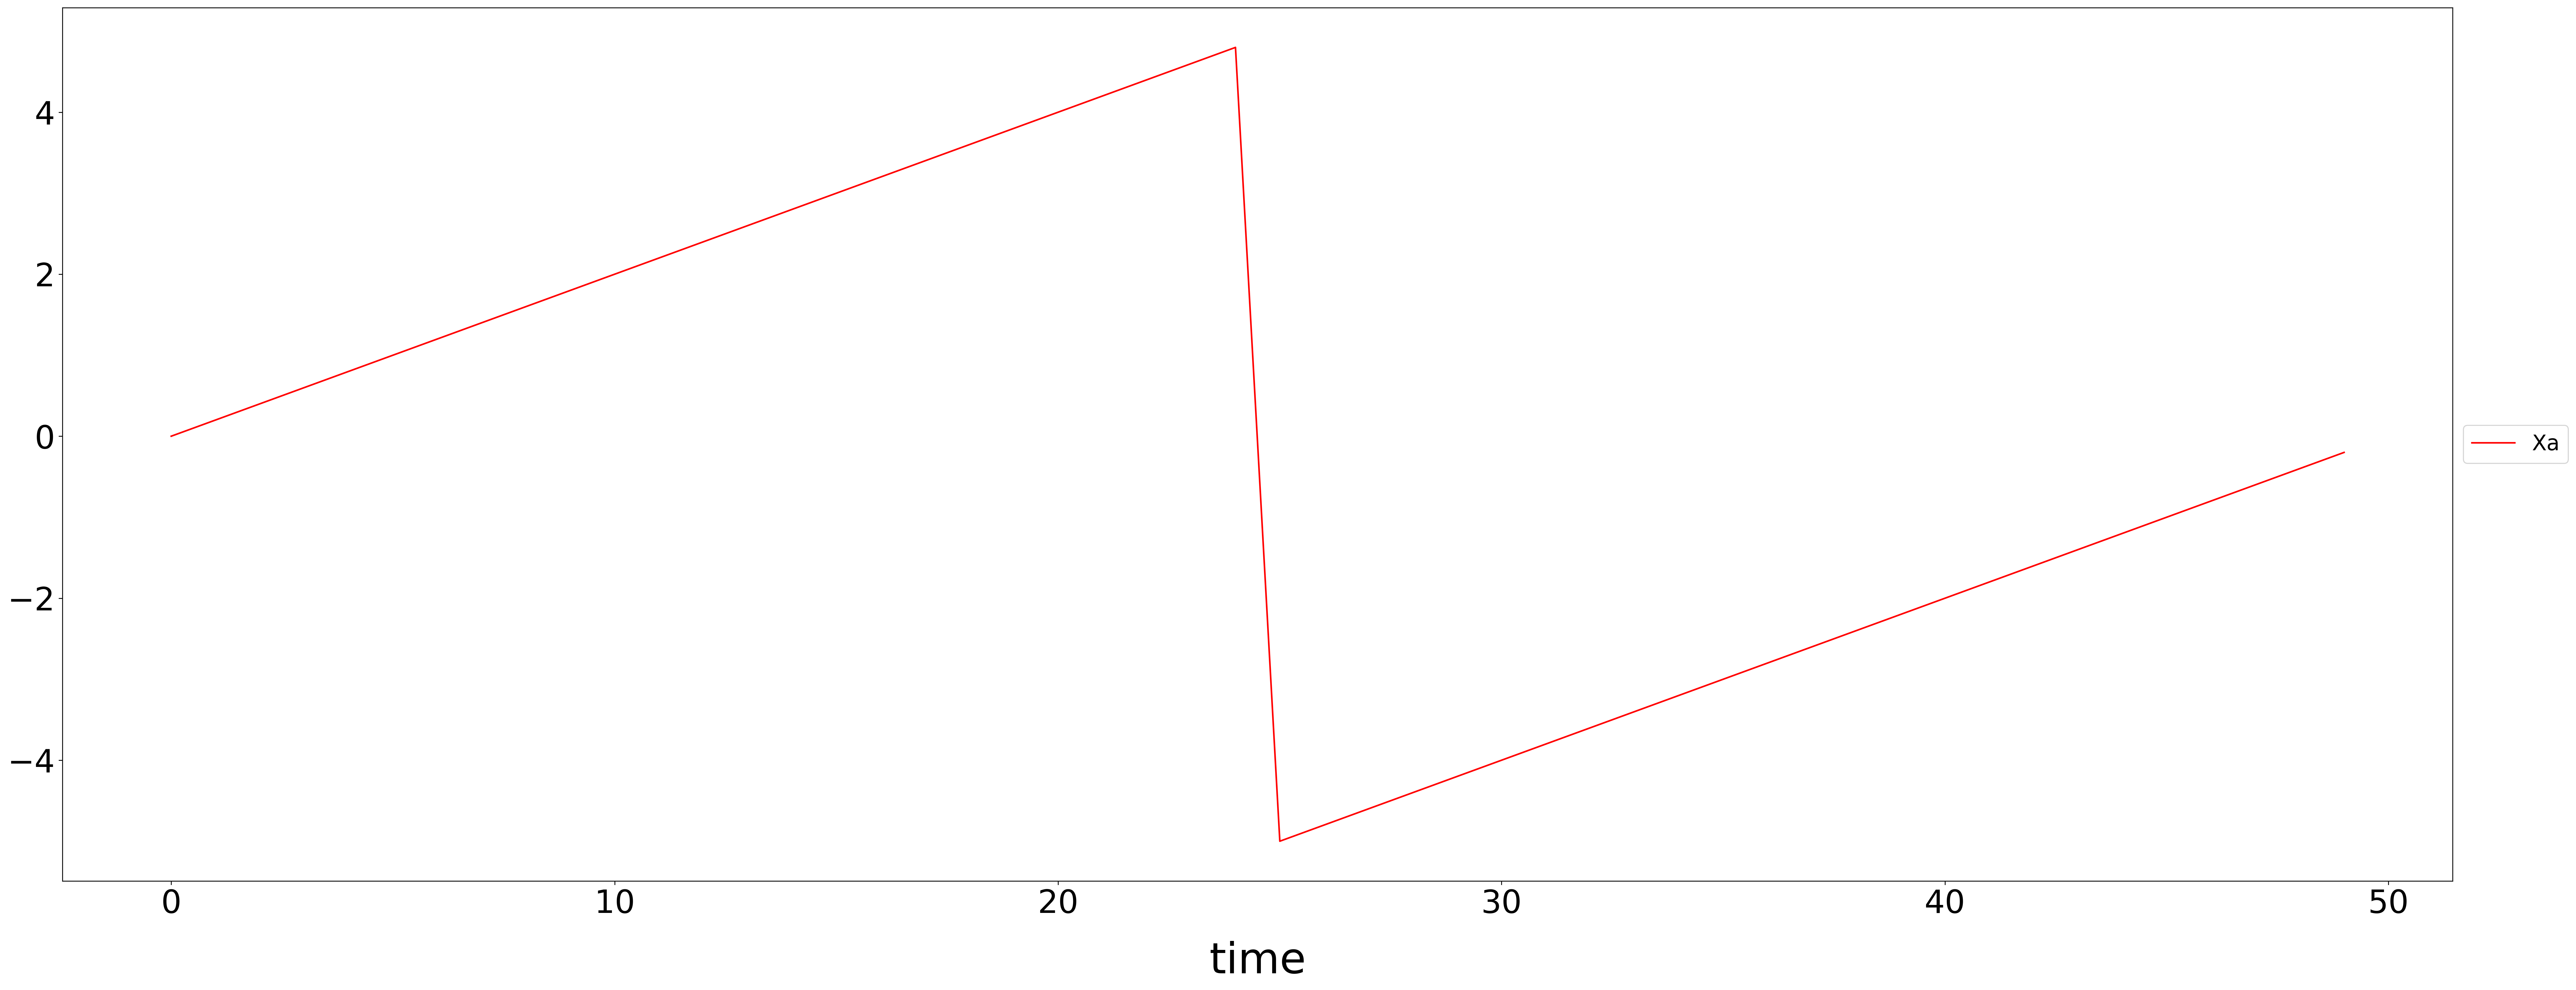

In [4]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

data = pd.read_csv("./32973_0000000000.csv")
# data = pd.read_csv("./32973_0000000000.resampled.csv")
data = np.array(data)
length=[]
x=0
y=0
z=0
xa=[]
ya=[]
za=[]
ma=[]
# 5s
print(len(data))
for i in range(50):
    length.append(100*i)
#     100ms
    for j in range(10):
        x+=data[j+10000+i*10,1]
        y+=data[j+10000+i*10,2]
        z+=data[j+10000+i*10,3]
    xa.append(x)
    ya.append(y)
    za.append(z)
    ma.append(math.sqrt(pow(x,2)+pow(y,2)+pow(z,2)))
    x=0
    y=0
    z=0
    
data_xa=np.array(xa)
fourier = np.fft.fft(data_xa)
n=data_xa.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
print(len(freq))
index=[]
for i in range (len(freq)):
    index.append(i)
pandasData={"freq":freq}    
df = pd.DataFrame(pandasData)
print(df)
print(xa)
df.to_csv('test.csv')

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(index, freq, color = 'r', label = "Xa")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()



